In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

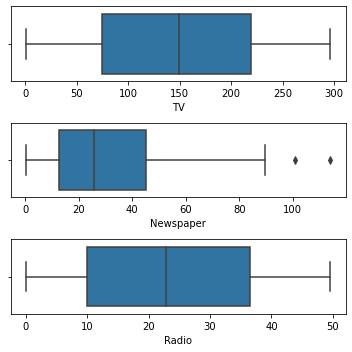

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt1 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt1 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

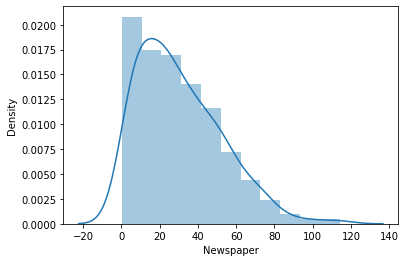

In [11]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
Upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(Upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

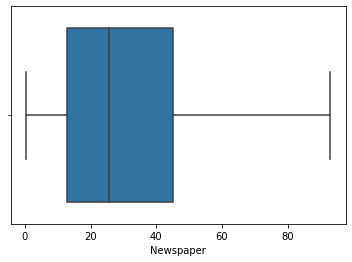

In [16]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

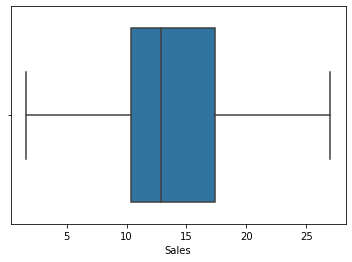

In [17]:
sns.boxplot(data['Sales'])

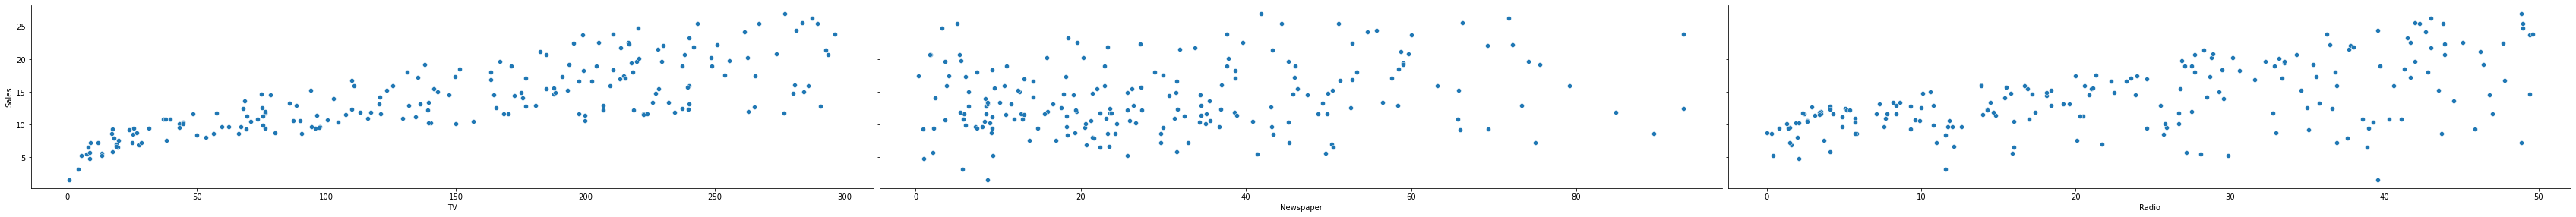

In [18]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales', height=4, aspect=4, kind='scatter')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

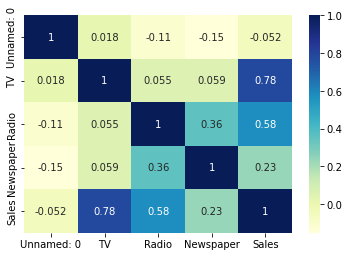

In [19]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show

In [20]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

[]


In [22]:
x = data['TV']
y = data['Sales']

In [23]:
x = x.values.reshape(-1,1)

In [24]:
x


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)


In [28]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred = knn.predict(x_train)

In [32]:
knn_test_pred = knn.predict(x_test)

In [33]:
print(knn_train_pred, knn_test_pred)

[18.1  11.88 10.98 20.14 13.   15.14 10.64 18.62 16.38 17.22 11.44 15.14
 16.04  9.6  18.9  13.   14.9  19.6   7.38  9.34 17.   14.92 14.04  4.26
 19.52 11.58 10.56  8.48 19.6   5.72 16.06 11.   17.34 17.7  14.04 11.04
 14.12 15.28 10.54  7.18 12.6  18.3   9.9  18.22 14.9  10.72 11.    7.18
 13.3  19.88 14.12 10.98 15.68 19.88 16.38 13.92  9.12  7.18 17.34 17.86
 14.12 19.96 11.58 21.56 16.94  6.52 14.92 15.06 15.14 16.06 17.   10.42
 13.   18.3  10.54 16.06 15.02 16.32 10.68 19.2  17.    7.9  18.64 21.56
 21.56  5.72  9.12 18.02 16.06  4.26 14.12  4.9  19.34 18.22 15.06  5.72
 17.   21.44 10.42 21.44 15.28 18.1   7.18  4.9  17.7  21.44  9.6  10.24
  7.38 10.82 10.98 15.06 15.68 16.2  12.6  11.58 10.64 16.06 10.54 18.62
 18.02  7.38  9.08 11.88 16.2  21.78  9.6  14.04 10.06 14.02 21.46 14.12
 15.14 13.  ] [10.    7.38 17.   10.68 13.26 13.78 16.32 12.68  7.9  19.52 21.44 18.22
 13.78 13.98 10.06 16.42 19.52 20.14 16.32 13.98 19.34 13.98 14.12 13.38
 10.24 21.78 10.54 10.54 17.   14.12 

In [34]:
Results = pd.DataFrame(columns=["Model","train R2","Test R2","Test RMSE","Varience"])

In [35]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
varience = r2_train-r2
Results = Results.append({"Model":"k-Nearest Neighbors","Test R2":r2,"Test RMSE":rmse,"varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5393417421024324
RMSE: 3.1413768454052886


In [36]:
Results.head()

,Model,train R2,Test R2,Test RMSE,Varience,varience
0,k-Nearest Neighbors,NaN,0.539342,3.141377,NaN,0.122924


In [37]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [38]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)



In [39]:
print(svr_train_pred,svr_test_pred)

[18.91079632 10.45369084 10.09527697 17.38261797 12.04373676 16.51025839
 11.51132556 17.14168806 18.02955239 18.22518554 10.24244856 16.49903227
 16.69965093  9.6537962  17.49647192 11.82708652 17.71971006 17.28649085
  7.64379599  9.32001254 15.5681937  13.88097268 12.86163056  7.29497973
 18.66395963 10.48414641 11.06220923  7.92543398 17.28138214  7.40210008
 18.40977959 10.53966496 16.42586039 18.79885102 12.70393332 11.74702802
 13.23604773 14.86730042  8.57158922  7.66988395 17.87248443 17.5305466
  9.80053882 18.922006   17.71971006 11.17739113 10.53966496  7.69334786
 13.07513892 17.43246884 13.29965084 10.12699678 15.24878084 17.45226028
 18.0540667  14.99531968  8.18177359  7.67319981 16.30131947 17.59785054
 13.34545152 18.92564129 10.47400799 18.87548954 15.46517513  7.50437138
 14.76795581 14.49105379 16.54948032 18.32922509 15.87240931  8.49552013
 12.04373676 17.53539171  8.75849308 18.35664563 17.63106772 17.93308392
 11.44581532 16.93444649 15.70012443  7.90519819 18.

In [40]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
varience = r2_train-r2
Results = Results.append({"Model":"k-Nearest Neighbors","Test R2":r2,"Test RMSE":rmse,"varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.614956363152521
RMSE: 2.872007589502776


In [41]:
Results.head()

,Model,train R2,Test R2,Test RMSE,Varience,varience
0,k-Nearest Neighbors,NaN,0.539342,3.141377,NaN,0.122924
1,k-Nearest Neighbors,NaN,0.614956,2.872008,NaN,-0.018107


In [42]:
import statsmodels.api as sm

In [43]:
x_train_constant = sm.add_constant(x_train)

In [44]:
model = sm.OLS(y_train, x_train_constant).fit()

In [45]:
model.params

const    6.829277
x1       0.048332
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           5.41e-29
Time:                        13:05:14   Log-Likelihood:                -354.13
No. Observations:                 134   AIC:                             712.3
Df Residuals:                     132   BIC:                             718.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8293      0.579     11.798      0.0

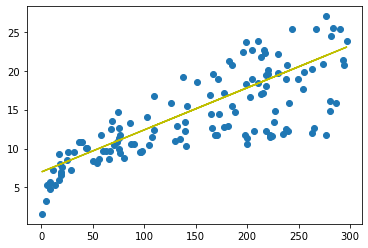

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 + 0.0541*x_train,'y')

In [48]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

178   -8.402628
37     4.260353
16     2.393841
168   -0.139901
89     4.563914
         ...   
193    4.709014
188   -4.752111
120    1.841469
50    -5.085928
94    -0.520090
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([20.20262765, 10.43964675, 10.10615878, 17.23990126, 12.13608551,
       16.45209637, 11.52710749, 17.0127428 , 17.92137666, 18.16303461,
       10.24148723, 16.44243005, 16.61642377,  9.70983976, 17.35106392,
       11.88476125, 17.57822238, 17.14807125,  7.69441251,  9.41501707,
       15.65462516, 14.15151275, 13.08338464,  6.86310919, 18.85417632,
       10.4686457 , 11.0437916 ,  8.06656575, 17.14323809,  7.24492874,
       18.41919203, 10.52181045, 16.37959899, 19.17316481, 12.90455777,
       11.79293123, 13.49420315, 15.05531346,  8.73837483,  7.73307778,
       17.74254979, 17.38489603,  9.84033505, 19.72897808, 17.57822238,
       11.16462058, 10.52181045,  7.7669099 , 13.32020943, 17.28823285,
       13.56186737, 10.13515774, 15.38396826, 17.30756549, 17.95037562,
       15.16647611,  8.35172212,  7.73791094, 16.27326949, 17.45256025,
       13.61019896, 20.05763288, 10.45897938, 20.395954  , 15.5676283 ,
        7.46242089, 14.9683166 , 14.7218255 , 16.48592848, 18.30

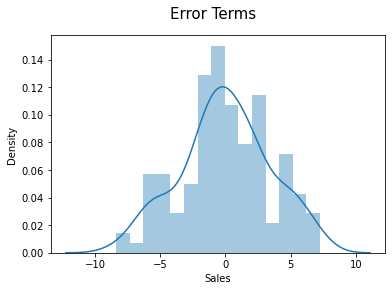

In [50]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms', fontsize = 15)
plt.show()

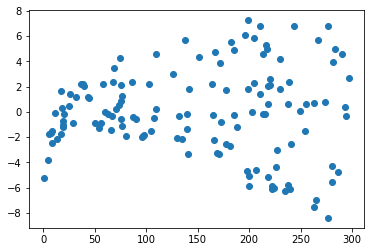

In [51]:
plt.scatter(x_train, res)
plt.show()

In [52]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [53]:
y_pred

array([11.36761325,  7.64608092, 15.90594942, 11.4787759 , 13.41203945,
       13.36370786, 17.47672605, 12.77889564,  7.97956889, 18.95567266,
       20.87926989, 19.66614701, 12.63873403, 14.06451589,  8.98003277,
       14.39800385, 18.83484369, 17.20606915, 17.84887928, 14.06934905,
       20.56994772, 13.94852008, 13.57153369, 12.43574136, 10.60880731,
       20.72944196,  8.90753539,  8.67554376, 16.06544366, 13.73586109,
       11.68176857,  8.15839576, 19.45832118, 15.3211372 ,  7.46725405,
       15.93494837, 16.37959899, 16.95957805, 11.38211272, 10.51697729,
       16.82908276,  8.12456365, 15.29213824, 11.09695635, 11.19845269,
       18.51102204,  7.2497619 , 13.16554834,  9.16369281, 16.19110579,
       12.28591343, 12.17958394, 16.16694   , 17.86337876, 18.42402519,
       18.4336915 , 12.49373926,  8.03756679, 10.16415669, 12.6773993 ,
       12.6532335 ,  7.20626347, 10.17382301, 18.04703879, 18.39502623,
       14.73149182])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test,svr_test_pred))

2.872007589502776

In [56]:
r2 = r2_score(y_test,y_pred)
r2

0.6069555211787696

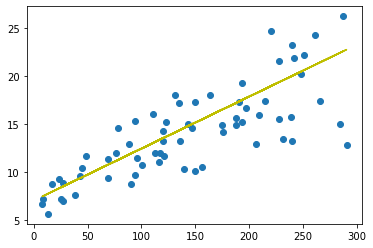

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test,'y')